### Social Media Sentiment Analysis
#### Sivaluxan Sivalingam(200584566)

#### import libraries

In [106]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [107]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivaluxan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sivaluxan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sivaluxan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Load Social Media Sentiment Data

In [108]:
#load social media data
data=pd.read_csv('sentimentdataset.csv')

In [109]:
data.shape

(732, 15)

In [110]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [111]:
data.head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [112]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

#### data cleaning

In [113]:

data['Sentiment'] = data['Sentiment'].str.strip()
data['Platform'] = data['Platform'].str.strip().str.capitalize()

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Check for missing values
data.isnull().sum()


Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [114]:
data.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


#### Exploratory Data Analysis

In [115]:
data['Sentiment'].value_counts()

Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: Sentiment, Length: 191, dtype: int64

##### Sentiment Distribution - only the top 20 most used sentiments 

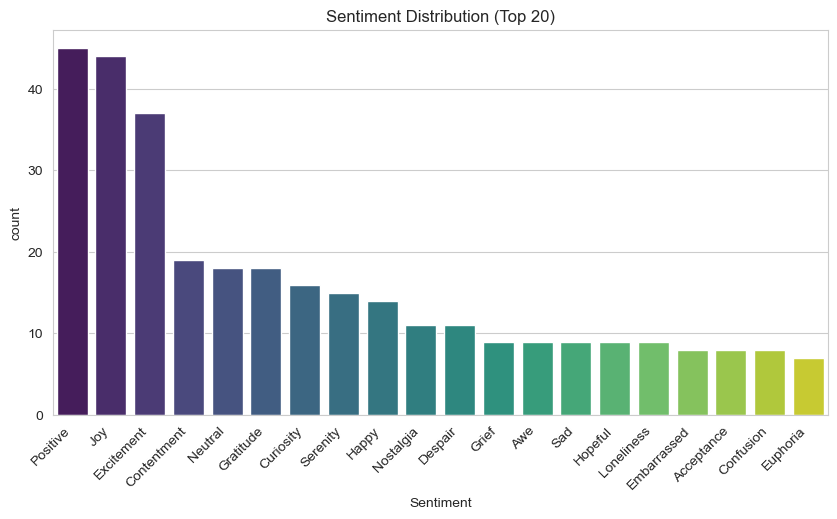

In [116]:
sns.set_style("whitegrid")
# Get the top 20 most used sentiments
top_20_sentiments = data["Sentiment"].value_counts().nlargest(20).index
filtered_df = data[data["Sentiment"].isin(top_20_sentiments)]

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility

plt.show()

##### Posts by Platform

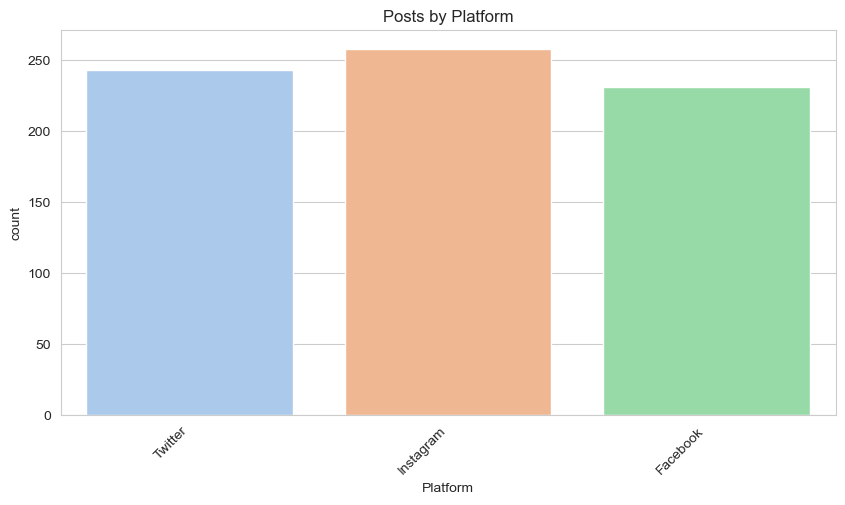

In [117]:
plt.figure(figsize=(10, 5))

sns.countplot(x=data["Platform"], palette="pastel")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")

plt.show()

##### Likes by Sentiment (Positive and Negative)

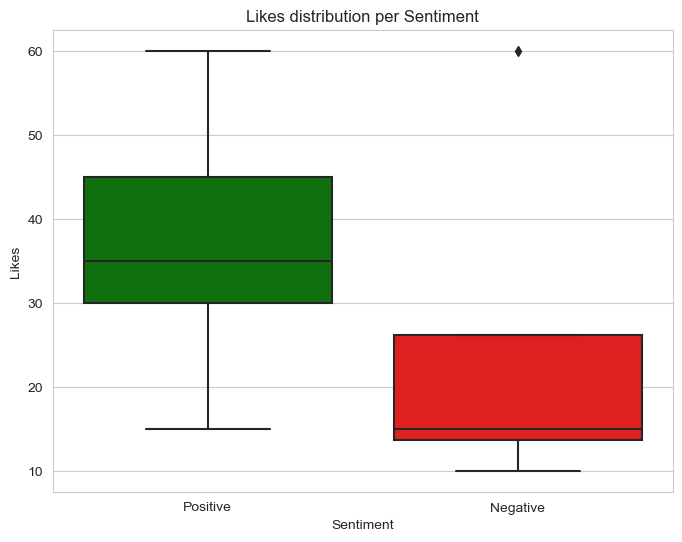

In [118]:
#Filter sentiments "Positive" and "Negative"
df_filtered = data[data['Sentiment'].isin(['Positive', 'Negative'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})

plt.title('Likes distribution per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')

plt.show()

##### Average Likes Per Hour

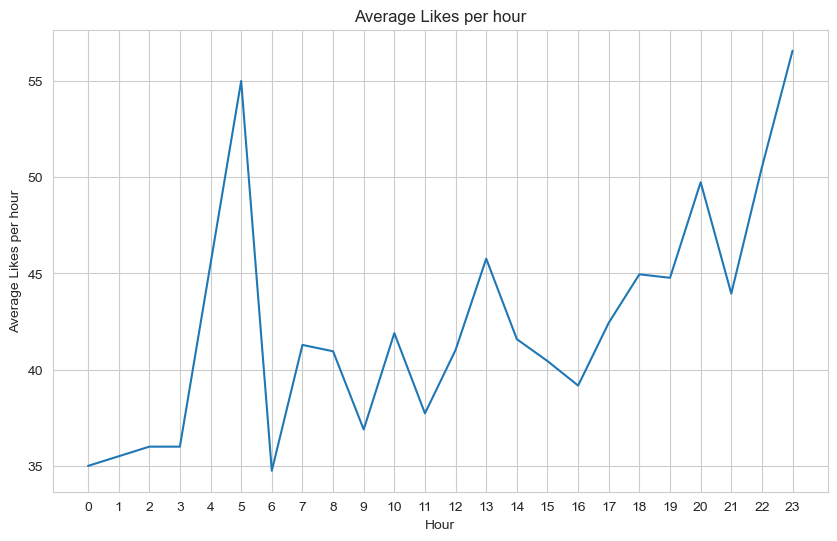

In [119]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['Hour'], y=data['Likes'], estimator='mean', ci=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

##### Average Likes for Each Platform

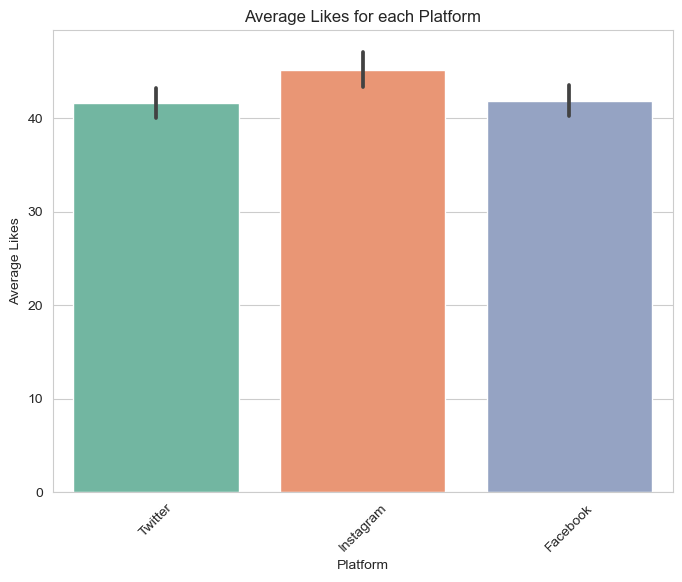

In [120]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Platform'], y=data['Likes'], estimator=np.mean, palette="Set2")
plt.title("Average Likes for each Platform")
plt.xlabel("Platform")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)  
plt.show()


In [121]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)

data['clean_text'] = data['Text'].apply(clean_text)

#### Clean Text Column



In [122]:
data[['Text','clean_text']].head()

,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


#### Word Corpus

In [123]:
#Create Word Corpus
corpus = ' '.join(data['clean_text']).split()
word_freq = Counter(corpus)

# Display Top 20 Words
common_words = word_freq.most_common(20)
print("Top 20 Most Frequent Words:", common_words)

Top 20 Most Frequent Words: [('new', 43), ('life', 38), ('day', 29), ('joy', 28), ('dream', 28), ('feeling', 27), ('moment', 27), ('like', 27), ('friend', 26), ('heart', 26), ('laughter', 24), ('night', 23), ('world', 22), ('art', 21), ('challenge', 21), ('echo', 21), ('time', 20), ('beauty', 20), ('journey', 20), ('emotion', 20)]


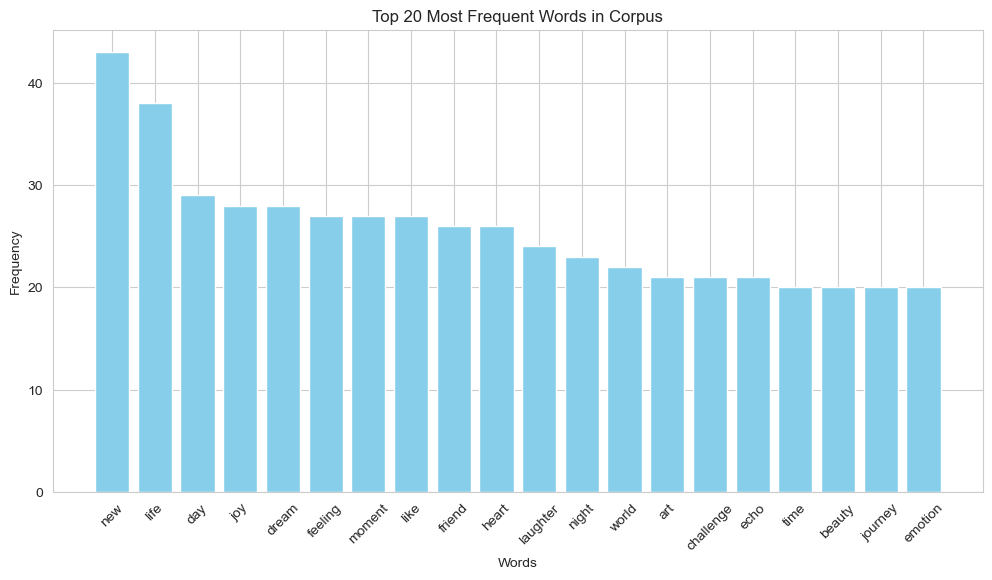

In [124]:
#Bar Chart of Top 20 Words
words, freqs = zip(*common_words)
plt.figure(figsize=(12,6))
plt.bar(words, freqs, color='skyblue')
plt.title("Top 20 Most Frequent Words in Corpus")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

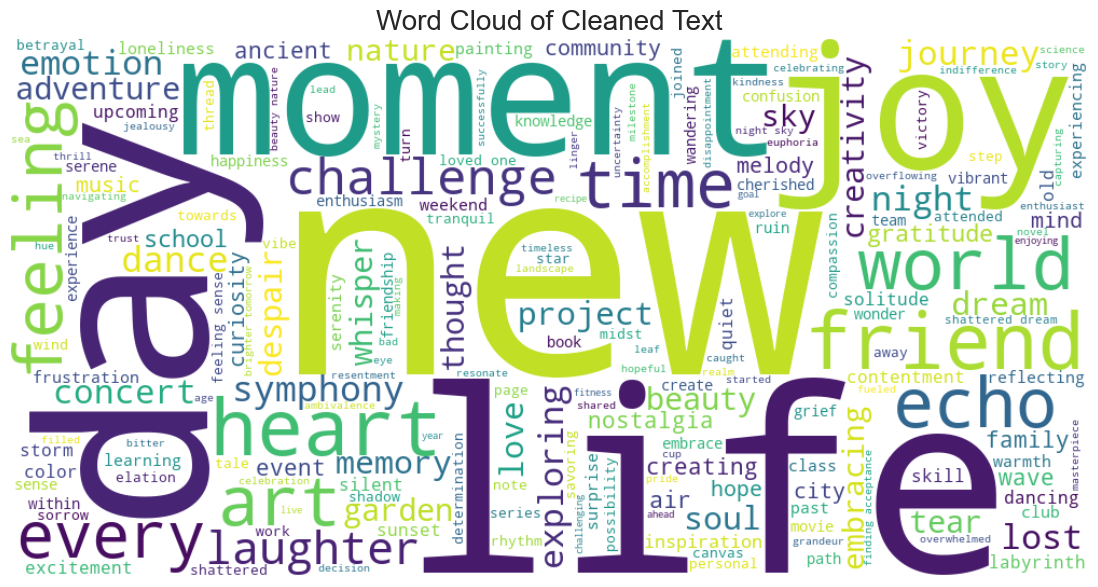

In [125]:
#Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(corpus))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Text", fontsize=20)
plt.show()

#### Train and Test Set

In [126]:
#Train/Test Split
X = data['clean_text']
y = data['Sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [127]:
X_train.shape,y_train.shape

((585, 2294), (585,))

In [128]:
X_test.shape,y_train.shape

((147, 2294), (585,))

#### Model training

In [129]:
#Train Logistic Regression Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Model evaluation

In [130]:
#Evaluate the Model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

                      precision    recall  f1-score   support

          Acceptance       0.67      1.00      0.80         2
          Admiration       0.50      0.50      0.50         2
           Adventure       0.00      0.00      0.00         0
           Affection       1.00      1.00      1.00         1
         Ambivalence       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         1
             Arousal       0.38      1.00      0.55         3
       ArtisticBurst       0.00      0.00      0.00         0
                 Awe       0.00      0.00      0.00         2
                 Bad       1.00      1.00      1.00         1
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.50      1.00      0.67         1
          Bitterness       1.00      1.00      1.00         1
         Bittersweet       0.00      0.00    

/Users/sivaluxan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sivaluxan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sivaluxan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sivaluxa

#### Thank you